In [15]:
from strategie import strategie,teststrategie
import sqlite3
import itertools
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
parametre={
    'periode_analyse_cours_action':"Month",
    'centile_max_action' : 0.4,
    'type_moyenne_glissante_cac':"Trimester",
    'centile_max_cac' : 0.5,
    'taux_gain':0.2,
    'periode_attente_vente':60,
}

name="Total"
print(teststrategie(name,parametre))

{'Ratio Moyen du gain ': 0.08945172216829395, 'Precision': 0.475, 'nb_strategie_excute': 80}


In [17]:
grid_params={
    'periode_analyse_cours_action':["Trimester","Year","Month"],
    'centile_max_action' : [0.5,0.4,0.3],
    'type_moyenne_glissante_cac':["Month","Trimester","Week"],
    'centile_max_cac' : [0.5,0.4,0.3],
    'taux_gain':[0.05,0.1,0.15,0.2],
    'periode_attente_vente':[90,60,30,20]
}


In [18]:
simulations_to_run = [dict(zip(grid_params.keys(), _)) for _ in itertools.product(*grid_params.values())]
simulations_to_run = [frozenset(simulation.items()) for simulation in simulations_to_run]
len(simulations_to_run)


1296

In [19]:
try:
    with open('grid_search_'+name+'.pickle', 'rb') as fd:
        simulation_scores = pickle.load(fd)
except FileNotFoundError:
    simulation_scores = {}


In [20]:
for params in simulations_to_run:
    dict_params = dict(params)
    if params in simulation_scores:
        print(f"Not running {dict_params}")
    else:
        print(f"Running {dict_params}")
        scores = teststrategie(name,dict_params)
        simulation_scores[params] = scores
        with open('grid_search_'+name+'.pickle', 'wb') as fd:
            pickle.dump(simulation_scores, fd)



Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 90, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'periode_attente_vente': 60, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'periode_attente_vente': 30, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 20, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 90, 'taux_gain': 0.1, 'centile_max_cac': 0.5, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode

In [21]:
liste=[]
for k, v in simulation_scores.items() :
    print(v)

{'Ratio Moyen du gain ': 0.05979732030533918, 'Precision': 0.8716216216216216}
{'Ratio Moyen du gain ': 0.029137508406614603, 'Precision': 0.722972972972973}
{'Ratio Moyen du gain ': 0.013501987167345755, 'Precision': 0.5405405405405406}
{'Ratio Moyen du gain ': 0.007517285093368545, 'Precision': 0.40540540540540543}
{'Ratio Moyen du gain ': 0.08099821078584865, 'Precision': 0.7635135135135135}
{'Ratio Moyen du gain ': 0.04594699330602672, 'Precision': 0.6216216216216216}
{'Ratio Moyen du gain ': 0.020259535566722824, 'Precision': 0.33783783783783783}
{'Ratio Moyen du gain ': 0.010884411283656747, 'Precision': 0.22972972972972974}
{'Ratio Moyen du gain ': 0.10513732428175293, 'Precision': 0.6013513513513513}
{'Ratio Moyen du gain ': 0.06092348801246744, 'Precision': 0.4864864864864865}
{'Ratio Moyen du gain ': 0.027654050198261608, 'Precision': 0.2702702702702703}
{'Ratio Moyen du gain ': 0.014551119121579687, 'Precision': 0.17567567567567569}
{'Ratio Moyen du gain ': 0.111039642332626

In [22]:

scores_df = pd.DataFrame(dict(k) | v for k, v in simulation_scores.items() if k in simulations_to_run and type(v)==dict )
scores_df.rename(columns = {'Ratio Moyen du gain ':'MeanGain'}, inplace = True)
scores_df["risque"]=1-scores_df["Precision"]


In [23]:
scores_df.pipe(lambda x: x[x.Precision == x.Precision.max()]  )

,periode_analyse_cours_action,centile_max_action,periode_attente_vente,centile_max_cac,taux_gain,type_moyenne_glissante_cac,MeanGain,Precision,risque
80,Trimester,0.5,90,0.3,0.05,Trimester,0.066543,1.0,0.0
224,Trimester,0.4,90,0.3,0.05,Trimester,0.067092,1.0,0.0
368,Trimester,0.3,90,0.3,0.05,Trimester,0.071198,1.0,0.0
942,Month,0.5,90,0.3,0.05,Trimester,0.068452,1.0,0.0
943,Month,0.5,60,0.3,0.05,Trimester,0.068452,1.0,0.0
946,Month,0.5,90,0.3,0.10,Trimester,0.116578,1.0,0.0
947,Month,0.5,60,0.3,0.10,Trimester,0.116578,1.0,0.0
950,Month,0.5,90,0.3,0.15,Trimester,0.172091,1.0,0.0
951,Month,0.5,60,0.3,0.15,Trimester,0.172091,1.0,0.0
1086,Month,0.4,90,0.3,0.05,Trimester,0.076928,1.0,0.0


In [24]:
scores_df.pipe(lambda x: x[x.taux_gain==0.05 ]  )

,periode_analyse_cours_action,centile_max_action,periode_attente_vente,centile_max_cac,taux_gain,type_moyenne_glissante_cac,MeanGain,Precision,risque
0,Trimester,0.5,90,0.5,0.05,Month,0.059797,0.871622,0.128378
1,Trimester,0.5,60,0.5,0.05,Month,0.029138,0.722973,0.277027
2,Trimester,0.5,30,0.5,0.05,Month,0.013502,0.540541,0.459459
3,Trimester,0.5,20,0.5,0.05,Month,0.007517,0.405405,0.594595
16,Trimester,0.5,90,0.4,0.05,Month,0.054015,0.890110,0.109890
...,...,...,...,...,...,...,...,...,...
1265,Month,0.3,20,0.4,0.05,Week,0.003537,0.450549,0.549451
1278,Month,0.3,90,0.3,0.05,Week,0.047267,0.818182,0.181818
1279,Month,0.3,60,0.3,0.05,Week,0.048658,0.792208,0.207792
1280,Month,0.3,30,0.3,0.05,Week,0.028465,0.623377,0.376623


In [25]:
scores_df.pipe(lambda x: x[x.MeanGain == x.MeanGain.max() ])


,periode_analyse_cours_action,centile_max_action,periode_attente_vente,centile_max_cac,taux_gain,type_moyenne_glissante_cac,MeanGain,Precision,risque
1242,Month,0.3,90,0.3,0.2,Trimester,0.237789,1.0,0.0
1243,Month,0.3,60,0.3,0.2,Trimester,0.237789,1.0,0.0


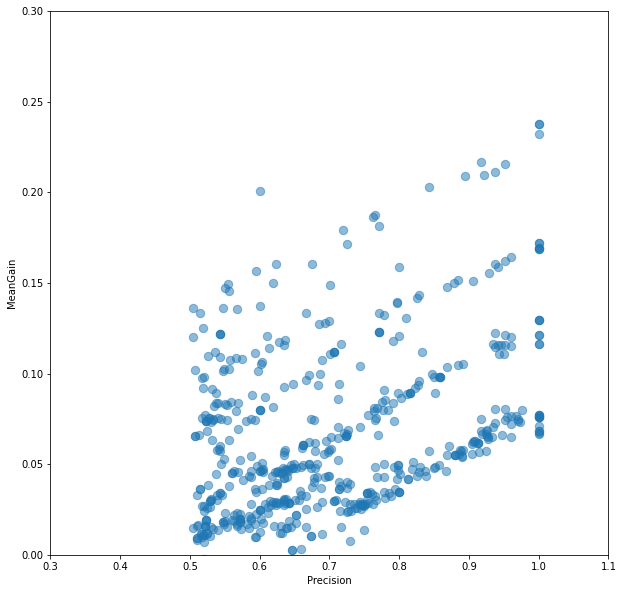

In [26]:
scores_df.pipe(lambda x: x[x.Precision > 0.5]).plot.scatter('Precision', 'MeanGain', figsize=(10, 10), s=70, alpha=0.5)
plt.xlim([0.3, 1.1])
plt.ylim([0, 0.3])
plt.savefig('gridsearch_gainprecision'+name+'.png')

Risque LVMH

In [27]:
name="LVMH"
try:
    with open('nuage_point_nbstrat_' + name + '.pickle', 'rb') as fd:
        simulation_scores = pickle.load(fd)
except FileNotFoundError:
    simulation_scores = {}

for params in simulations_to_run:
    dict_params = dict(params)
    if params in simulation_scores:
        print(f"Not running {dict_params}")
    else:
        print(f"Running {dict_params}")
        scores = teststrategie(name, dict_params)
        simulation_scores[params] = scores
        with open('nuage_point_nbstrat_' + name + '.pickle', 'wb') as fd:
            pickle.dump(simulation_scores, fd)

Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 90, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'periode_attente_vente': 60, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'periode_attente_vente': 30, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 20, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 90, 'taux_gain': 0.1, 'centile_max_cac': 0.5, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode

In [28]:
scores_df = pd.DataFrame(dict(k) | v for k, v in simulation_scores.items() if k in simulations_to_run and type(v)==dict )
scores_df.rename(columns = {'Ratio Moyen du gain ':'MeanGain'}, inplace = True)
scores_df["risque"]=1-scores_df["Precision"]
print(scores_df)


     periode_analyse_cours_action  centile_max_action  periode_attente_vente  \
0                       Trimester                 0.5                     90   
1                       Trimester                 0.5                     60   
2                       Trimester                 0.5                     30   
3                       Trimester                 0.5                     20   
4                       Trimester                 0.5                     90   
...                           ...                 ...                    ...   
1268                        Month                 0.3                     20   
1269                        Month                 0.3                     90   
1270                        Month                 0.3                     60   
1271                        Month                 0.3                     30   
1272                        Month                 0.3                     20   

      centile_max_cac  taux_gain type_m

In [29]:
scores_df["c1"] = (scores_df["nb_strategie_excute"] / 103) * (
            scores_df["nb_strategie_excute"] / 103) - (scores_df["risque"]) * (scores_df["risque"])

scores_df.pipe(lambda x: x[x.taux_gain==0.2 ]).pipe(lambda x: x[x.risque<0.5 ]).pipe(lambda x: x[x.MeanGain>0.10 ])


,periode_analyse_cours_action,centile_max_action,periode_attente_vente,centile_max_cac,taux_gain,type_moyenne_glissante_cac,MeanGain,Precision,nb_strategie_excute,risque,c1
186,Trimester,0.4,90,0.3,0.2,Month,0.178524,0.550000,40,0.450000,-0.051685
311,Trimester,0.3,90,0.4,0.2,Month,0.171556,0.513514,37,0.486486,-0.107628
327,Trimester,0.3,90,0.3,0.2,Month,0.179206,0.593750,32,0.406250,-0.068517
373,Trimester,0.3,90,0.3,0.2,Trimester,0.172500,0.523810,21,0.476190,-0.185189
875,Month,0.5,90,0.4,0.2,Month,0.174285,0.638298,47,0.361702,0.077391
891,Month,0.5,90,0.3,0.2,Month,0.200393,0.875000,32,0.125000,0.080897
907,Month,0.5,90,0.5,0.2,Trimester,0.173801,0.644444,45,0.355556,0.064456
923,Month,0.5,90,0.4,0.2,Trimester,0.163685,0.562500,32,0.437500,-0.094884
938,Month,0.5,90,0.3,0.2,Trimester,0.192771,0.857143,14,0.142857,-0.001933
1017,Month,0.4,90,0.4,0.2,Month,0.177453,0.650000,40,0.350000,0.028315


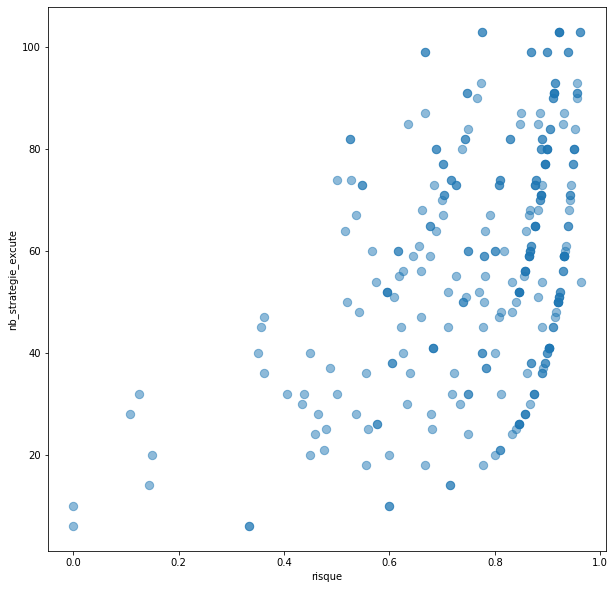

In [30]:

scores_df.pipe(lambda x: x[ x.taux_gain==0.2]).plot.scatter('risque', 'nb_strategie_excute', figsize=(10, 10), s=70, alpha=0.5)
"""plt.xlim([0, 1.1])
plt.ylim([0, 0.3])"""
plt.savefig('precision_nbstart'+name+'.png')

Risque Total

In [31]:
name="Total"
try:
    with open('nuage_point_nbstrat_' + name + '.pickle', 'rb') as fd:
        simulation_scores_total = pickle.load(fd)
except FileNotFoundError:
    simulation_scores_total = {}

for params in simulations_to_run:
    dict_params = dict(params)
    if params in simulation_scores_total:
        print(f"Not running {dict_params}")
    else:
        print(f"Running {dict_params}")
        scores = teststrategie(name, dict_params)
        simulation_scores_total[params] = scores
        with open('nuage_point_nbstrat_' + name + '.pickle', 'wb') as fd:
            pickle.dump(simulation_scores_total, fd)

Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 90, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'periode_attente_vente': 60, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'periode_attente_vente': 30, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 20, 'centile_max_cac': 0.5, 'taux_gain': 0.05, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode_analyse_cours_action': 'Trimester', 'centile_max_action': 0.5, 'periode_attente_vente': 90, 'taux_gain': 0.1, 'centile_max_cac': 0.5, 'type_moyenne_glissante_cac': 'Month'}
Not running {'periode

In [32]:
scores_df_total = pd.DataFrame(dict(k) | v for k, v in simulation_scores_total.items() if k in simulations_to_run and type(v)==dict )
scores_df_total.rename(columns = {'Ratio Moyen du gain ':'MeanGain'}, inplace = True)
scores_df_total["risque"]=1-scores_df_total["Precision"]
scores_df_total["c1"]=-scores_df_total["risque"]**2+scores_df_total["nb_strategie_excute"]/200
print(scores_df_total)

     periode_analyse_cours_action  centile_max_action  periode_attente_vente  \
0                       Trimester                 0.5                     90   
1                       Trimester                 0.5                     60   
2                       Trimester                 0.5                     30   
3                       Trimester                 0.5                     20   
4                       Trimester                 0.5                     90   
...                           ...                 ...                    ...   
1291                        Month                 0.3                     20   
1292                        Month                 0.3                     90   
1293                        Month                 0.3                     60   
1294                        Month                 0.3                     30   
1295                        Month                 0.3                     20   

      centile_max_cac  taux_gain type_m

In [33]:
scores_df_total.pipe(lambda x: x[x.Precision == x.Precision.max()])

,periode_analyse_cours_action,centile_max_action,periode_attente_vente,centile_max_cac,taux_gain,type_moyenne_glissante_cac,MeanGain,Precision,nb_strategie_excute,risque,c1
80,Trimester,0.5,90,0.3,0.05,Trimester,0.066543,1.0,40,0.0,0.200
224,Trimester,0.4,90,0.3,0.05,Trimester,0.067092,1.0,35,0.0,0.175
368,Trimester,0.3,90,0.3,0.05,Trimester,0.071198,1.0,27,0.0,0.135
944,Month,0.5,90,0.3,0.05,Trimester,0.068452,1.0,19,0.0,0.095
945,Month,0.5,60,0.3,0.05,Trimester,0.068452,1.0,19,0.0,0.095
948,Month,0.5,90,0.3,0.10,Trimester,0.116578,1.0,19,0.0,0.095
949,Month,0.5,60,0.3,0.10,Trimester,0.116578,1.0,19,0.0,0.095
952,Month,0.5,90,0.3,0.15,Trimester,0.172091,1.0,19,0.0,0.095
953,Month,0.5,60,0.3,0.15,Trimester,0.172091,1.0,19,0.0,0.095
1088,Month,0.4,90,0.3,0.05,Trimester,0.076928,1.0,12,0.0,0.060


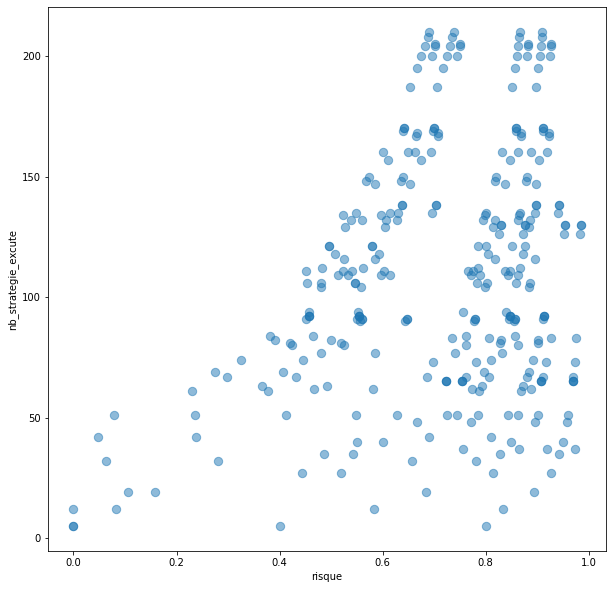

In [34]:
scores_df_total.pipe(lambda x: x[ x.taux_gain==0.2]).plot.scatter('risque', 'nb_strategie_excute', figsize=(10, 10), s=70, alpha=0.5)
plt.savefig('precision_nbstart'+name+'.png')

In [35]:
scores_df_total["c1"]=(scores_df_total["nb_strategie_excute"]/121)*(scores_df_total["nb_strategie_excute"]/121)-(scores_df_total["risque"])*(scores_df_total["risque"])

In [36]:
scores_df_total.pipe(lambda x: x[x.taux_gain==0.2 ]).pipe(lambda x: x[x.risque<0.5 ]).pipe(lambda x: x[x.MeanGain>0.15 ])

,periode_analyse_cours_action,centile_max_action,periode_attente_vente,centile_max_cac,taux_gain,type_moyenne_glissante_cac,MeanGain,Precision,nb_strategie_excute,risque,c1
44,Trimester,0.5,90,0.3,0.2,Month,0.160541,0.675676,74,0.324324,0.268832
188,Trimester,0.4,90,0.3,0.2,Month,0.171494,0.724638,69,0.275362,0.249358
189,Trimester,0.4,60,0.3,0.2,Month,0.156484,0.594203,69,0.405797,0.160511
332,Trimester,0.3,90,0.3,0.2,Month,0.181710,0.770492,61,0.229508,0.201475
333,Trimester,0.3,60,0.3,0.2,Month,0.160708,0.622951,61,0.377049,0.111983
908,Month,0.5,90,0.3,0.2,Month,0.209796,0.921569,51,0.078431,0.171500
909,Month,0.5,60,0.3,0.2,Month,0.187471,0.764706,51,0.235294,0.122288
956,Month,0.5,90,0.3,0.2,Trimester,0.208906,0.894737,19,0.105263,0.013576
957,Month,0.5,60,0.3,0.2,Trimester,0.203174,0.842105,19,0.157895,-0.000274
1052,Month,0.4,90,0.3,0.2,Month,0.215557,0.952381,42,0.047619,0.118216
